In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Exp_Proj_5490/Project/EP5490_Data.xlsx')

In [ ]:
df.describe()

,Annonymized ID,Compa Ratio,Tenure,Base Pay Mid Point Annualized,Currency Conversion Rate,Cost to Replace Employee Multiplier
count,25995.000000,25995.000000,25995.000000,2.599500e+04,25990.000000,25995.000000
mean,36705.081016,0.899448,12.075323,4.061527e+05,0.536909,1.015782
std,25162.698214,0.743398,9.616444,9.395074e+05,0.444619,0.347577
min,1111.000000,0.000000,0.000000,0.000000e+00,0.006704,0.500000
25%,14860.500000,0.802000,3.978082,6.499740e+04,0.027697,0.500000
50%,33063.000000,0.890000,9.876712,1.495936e+05,0.747356,1.250000
75%,54775.500000,0.977000,18.391781,3.120000e+05,1.000000,1.250000
max,87564.000000,16.829000,53.405479,2.019000e+07,1.273561,1.250000


In [ ]:
df.dtypes

Annonymized ID                                  int64
Job Code                                       object
Job Title                                      object
Job Function                                   object
Job Category                                   object
Job Group                                      object
Compa Ratio                                   float64
Pay Level                                      object
Work Location                                  object
Work Country                                   object
Work Region                                    object
Gender                                         object
Employee Status                                object
Termination Date                       datetime64[ns]
Tenure                                        float64
Tenure Bucket                                  object
Base Pay Mid Point Annualized                 float64
Currency Conversion Rate                      float64
Generation                  

In [ ]:
df.shape

(25995, 23)

In [ ]:
# A Unique value count of categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns  # Get list of categorical columns

unique_count = {}

for column in categorical_columns:
    unique_count[column] = df[column].nunique()

print(unique_count)

{'Job Code': 4571, 'Job Title': 191, 'Job Function': 22, 'Job Category': 11, 'Job Group': 4, 'Pay Level': 32, 'Work Location': 82, 'Work Country': 27, 'Work Region': 3, 'Gender': 4, 'Employee Status': 2, 'Tenure Bucket': 6, 'Generation': 5, 'Work Structure': 3, 'Termination Type': 5, 'Termination Reason ': 37}


In [ ]:
# Frequency count of categories
freq_count = {}

for column in categorical_columns:
    freq_counts = df[column].value_counts()
    freq_count[column] = freq_counts.head(3)

for column, counts in freq_count.items():
    print(f"Top 3 {column} Counts:")
    print(counts)
    print()

Top 3 Job Code Counts:
1788_SGP    581
1975_SGP    540
1211_SGP    519
Name: Job Code, dtype: int64

Top 3 Job Title Counts:
Sr Engineer                   2446
Engineering Specialist IV     2224
Engineering Specialist III    2190
Name: Job Title, dtype: int64

Top 3 Job Function Counts:
Engineering             10610
Manufacturing            6049
Engineering Services     1936
Name: Job Function, dtype: int64

Top 3 Job Category Counts:
Engineering Professional    8898
Operations Support          7402
Professional                4226
Name: Job Category, dtype: int64

Top 3 Job Group Counts:
Professional    13534
Support          8118
Management       3316
Name: Job Group, dtype: int64

Top 3 Pay Level Counts:
P3    3701
P4    2870
P2    2561
Name: Pay Level, dtype: int64

Top 3 Work Location Counts:
Korat Thailand            3670
Teparuk Thailand          2226
Longmont United States    2044
Name: Work Location, dtype: int64

Top 3 Work Country Counts:
United States    7630
Thailand      

In [ ]:
# Histograms of continuous value columns (age, salary)
continuous_columns = df.select_dtypes(include=['int64','float64']).columns
continuous_columns = continuous_columns.drop('Annonymized ID')

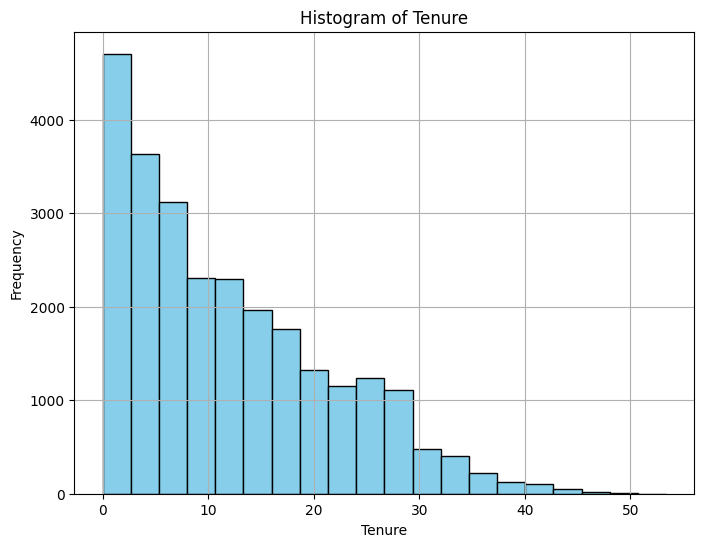

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(df['Tenure'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.title('Histogram of Tenure')
plt.grid(True)
plt.show()

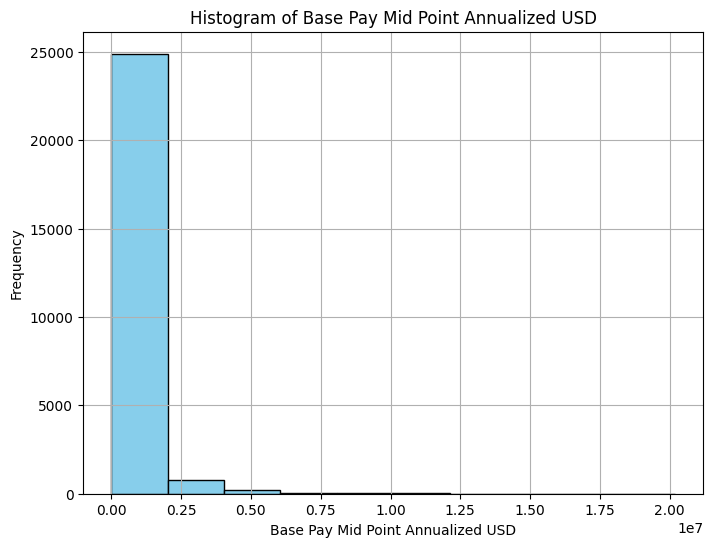

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(df['Base Pay Mid Point Annualized'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Base Pay Mid Point Annualized USD')
plt.ylabel('Frequency')
plt.title('Histogram of Base Pay Mid Point Annualized USD')
plt.grid(True)
plt.show()

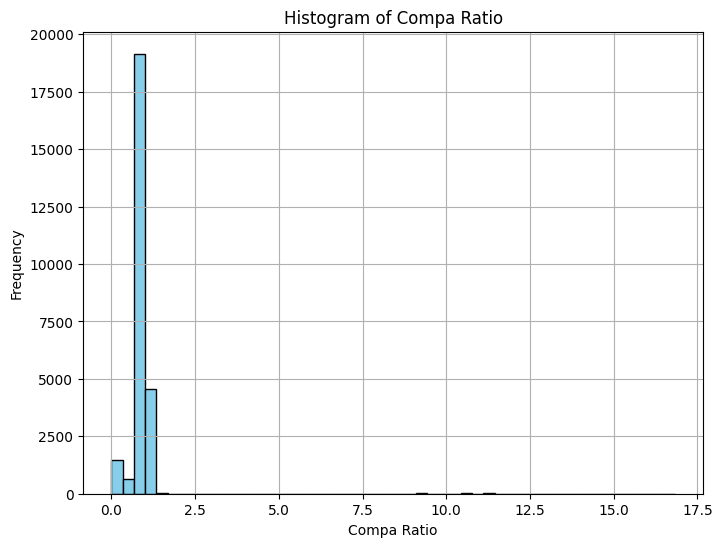

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(df['Compa Ratio'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Compa Ratio')
plt.ylabel('Frequency')
plt.title('Histogram of Compa Ratio')
plt.grid(True)
plt.show()

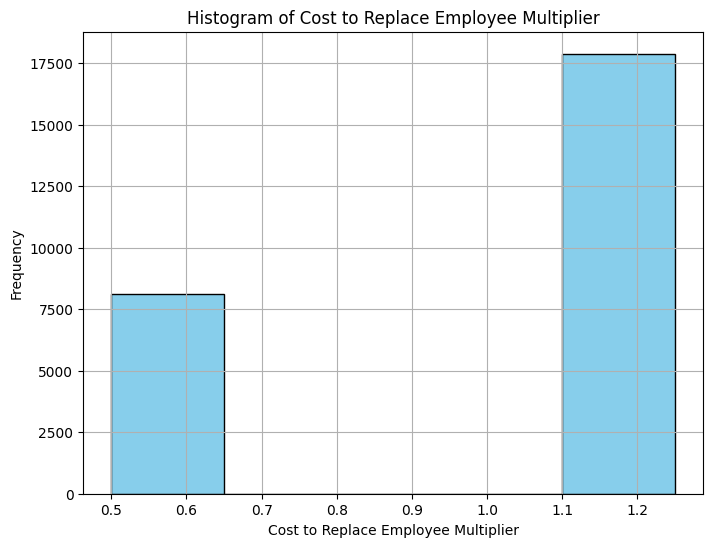

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(df['Cost to Replace Employee Multiplier'], bins=5, color='skyblue', edgecolor='black')
plt.xlabel('Cost to Replace Employee Multiplier')
plt.ylabel('Frequency')
plt.title('Histogram of Cost to Replace Employee Multiplier')
plt.grid(True)
plt.show()

In [ ]:
# Variance of continuous value columns (age, salary)
var_count = {}

for column in continuous_columns:
    var_counts = df[column].var()
    var_count[column] = var_counts

print("Variance of Continuous Value Columns:")
for column, variance in var_count.items():
    print(f"{column}: {variance:.2f}")

Variance of Continuous Value Columns:
Compa Ratio: 0.55
Tenure: 92.48
Base Pay Mid Point Annualized: 882674086035.31
Currency Conversion Rate: 0.20
Cost to Replace Employee Multiplier: 0.12


<ipython-input-18-a2d648596825>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = sg.corr()


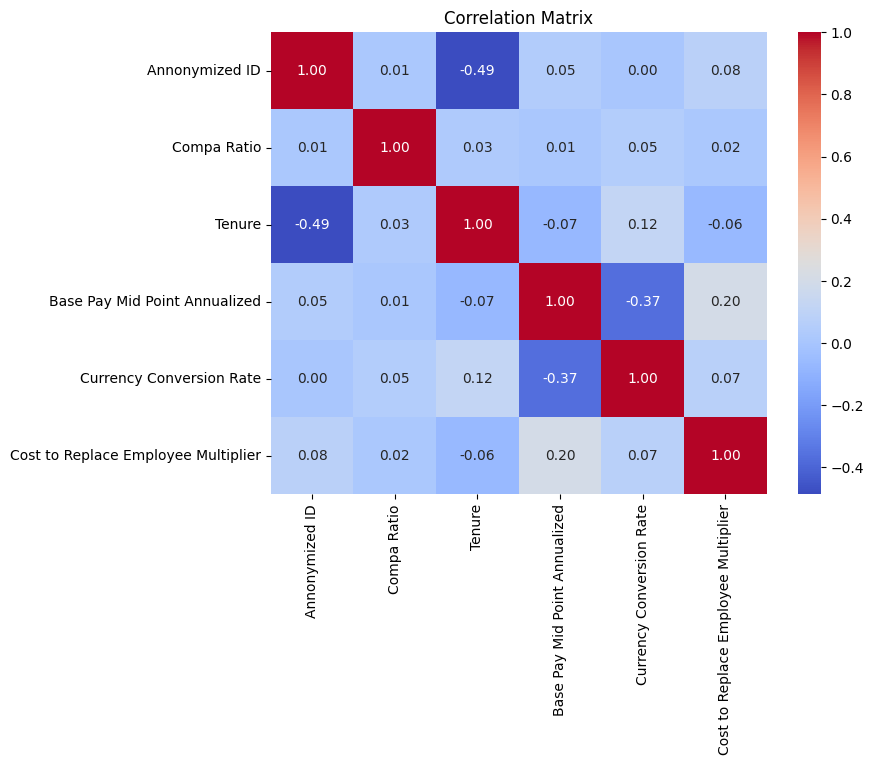

In [ ]:
# correlation heatmap
correlation_matrix = df.corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()